### Tensor Manipulation

In [1]:
import torch

In [2]:
# Create a two-dimensional tensor

z = torch.zeros(5, 3)
print(z)
print(z.type)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
<built-in method type of Tensor object at 0x7f98f18b1fb0>


Here we got a 5x3 matrix filled with zeros and are 32-bit floating point numbers which is default in PyTorch.

If we convert them to 16-bit integers, you do the following -

In [3]:
i = torch.ones((5, 3), dtype = torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


Seeding and generating the random tensors. They are used for initializing the weights.

In [4]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print("A random tensor: ")
print(r1)

r2 = torch.rand(2, 2)
print('\n A different random tensor: ')
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print("\n Should match r1: ")
print(r3)

A random tensor: 
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

 A different random tensor: 
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

 Should match r1: 
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


Arithmetic operations over tensor

In [5]:
ones = torch.ones(2, 3)
print('\n', ones)

twos = torch.ones(2, 3) * 2
print('\n', twos)

threes = ones + twos
print('\n', threes)


 tensor([[1., 1., 1.],
        [1., 1., 1.]])

 tensor([[2., 2., 2.],
        [2., 2., 2.]])

 tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [6]:
# Creating a random tensor between -1 and 1 -
r = torch.rand(2, 2) - 0.5 * 2
print(r)

# common mathematical operations 
print('\n Absolute value of r: ')
print(torch.abs(r))

# trigonometric functions -
print('\n Inverse sine of r: ')
print(torch.asin(r))

# linear algebra operations like determinant and singular value decomposition
print('\n Determinant of r: ')
print(torch.det(r))
print('\n Singular Value Decomposition of r: ')
print(torch.svd(r))

# statistical and aggregate functions
print('\n Average and Standatd Deviation of r: ')
print(torch.std_mean(r))
print('\n Maximum value of r: ')
print(torch.max(r))

tensor([[-0.5784, -0.9309],
        [-0.7668, -0.5953]])

 Absolute value of r: 
tensor([[0.5784, 0.9309],
        [0.7668, 0.5953]])

 Inverse sine of r: 
tensor([[-0.6168, -1.1970],
        [-0.8738, -0.6377]])

 Determinant of r: 
tensor(-0.3695)

 Singular Value Decomposition of r: 
torch.return_types.svd(
U=tensor([[-0.7512, -0.6601],
        [-0.6601,  0.7512]]),
S=tensor([1.4415, 0.2563]),
V=tensor([[ 0.6525, -0.7578],
        [ 0.7578,  0.6525]]))

 Average and Standatd Deviation of r: 
(tensor(0.1656), tensor(-0.7179))

 Maximum value of r: 
tensor(-0.5784)


### Autograd

Automated diffrentiation engine

Here the computation as a graph built at run time

Let's take an example of an RNN unit where you have an input layer a hidden layer.

We will see how computation as a graph is built at run time.


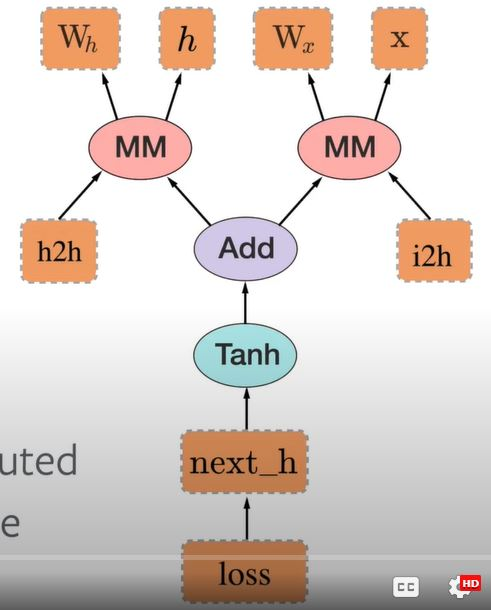

In [7]:
from IPython.display import Image
Image('images/autograd.JPG', width = 200, height = 200)

In [8]:
x = torch.randn(1, 10) # input nodes from the Lth layer
print('\n Input nodes', x.shape)

prev_h = torch.randn(1, 20) # output from the previous [L-1] hidden later
print('\n Previous hidden layer', prev_h.shape)

w_x = torch.randn(20, 10) # weights for the Lth input layer
print('\n Weights for the input layer', w_x.shape)

w_h = torch.randn(20, 20) # weights for the L-1 hidden layer, Here 20 cols
print('\n Weights for the hidden layer', w_h.shape)


 Input nodes torch.Size([1, 10])

 Previous hidden layer torch.Size([1, 20])

 Weights for the input layer torch.Size([20, 10])

 Weights for the hidden layer torch.Size([20, 20])


In [9]:
from torch.autograd.variable import Variable
# While defining a variable we pass the parameter requires_grad which indicates if 
# the variable is trainable or not. By default, it is set to false.

# Then we need to matrix multiply (mm) with the nodes and their weights

i2h = torch.mm(w_x, x.t())
h2h = torch.mm(w_h, prev_h.t())

# Now we will add both the Lth layer and L-1th hidden layer to get the total signal

next_h = i2h + h2h
print('\n next_h', next_h.shape)

# now we will pass it through the activation, in this case a hyperbolic tangent
next_h = next_h.tanh()
print('\n After activation : next_h', next_h.shape)

# now we compute the loss for this output
# It is the difference between the correct output and actual prediction of our model
loss = next_h.sum()
loss = Variable(loss, requires_grad = True)
print('\n Loss: ', loss)

# Now we need to calculate the derivative of the loss with respect to all the 
# parameters in the model. This step is also called as Backpropagation. As there is a history
# tracking in the forward pass, so it can do the backpropagation using those meta information
loss.backward()


 next_h torch.Size([20, 1])

 After activation : next_h torch.Size([20, 1])

 Loss:  tensor(-0.6230, requires_grad=True)


### PyTorch Model Training

In [10]:
import torch
import torch.nn as nn # torch.nn.Module is the parent for PyTorch models
import torch.nn.functional as F # for the activation function

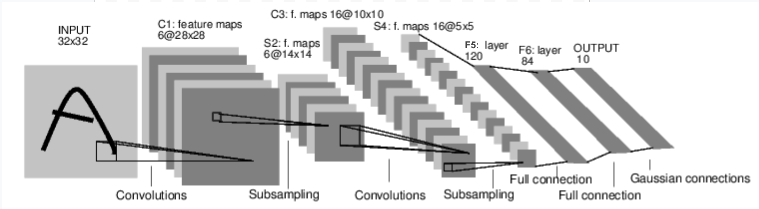

In [11]:
from IPython.display import Image
Image('images/mnist.png', width = 700, height = 200)

The above is a diagram of LeNet-5. It was built to read small images of handwritten numbers (the MNIST dataset), and correctly classify which digit was represented in the image.

1. Layer C1 is a convolution layer, which scans the input image for features it learned during training. It outputs a map of where it saw each of its learned features in the image. This "activation map" is downsampled in layer S2.

2. Layer C3 is another convolutional layer, this time scanning C1's activation map for combinations of features. It also puts out an activation map describing the spatial locations of these feature combinations, which is downsampled in layer S4.

3. Finally, the fully-connected layers at the end, F5, F6 and OUTPUT are a classifier that takes the final activaion map, and classifies it into one of ten bins representing the 10 digits.

Below we will express this simple neural network in code.

In [12]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    # 1 input channel (black & white), 6 output channels, 3x3 square convolution kernel
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3) # input channel is 6 which was the output channel of conv1

    # an affine operation : y = Wx + b
    self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6*6 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) # 10 is the number of classes

  def forward(self, x):
    # Max Pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))

    # if the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)

    x = x.view(-1, self.num_flat_features(x))

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return w_x

  def num_flat_features(self, x):
    size = x.size()[1:] # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [13]:
# Let's instantiate this object and run a sample input through it -

net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [14]:
input = torch.rand(1, 1, 32, 32) # 32 * 32 black and white image. [batch_dim * channel * length * width]
print("\n Image batch shape: ")
print(input.shape)


 Image batch shape: 
torch.Size([1, 1, 32, 32])


In [15]:
output = net(input) # we don't call forward() directly
print('\n Raw Output: ')
print(output.shape)


 Raw Output: 
torch.Size([20, 10])


### Datasets and Dataloaders

In [16]:
%matplotlib inline

In [17]:
import torch
import torchvision
import torchvision.transforms as transforms

Transform the incoming images into a PyTorch tensor.

Here we specify two transformations for our input -

1. transforms.ToTensor() : converts images loaded by Pillow into PyTorch tensors
2. transforms.Normalize() : adjusts the values of the tensor so that their average is zero and their standard deviation is 0.5. Most activation functions have their stongest gradients around x = 0, so centering our data can result in speed of learning.

There are many other transformations available including cropping, centering, rotationm, and reflection

In [18]:
# Composes several transforms together

transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

We will now create an instance of the CIFAR10 dataset. This is a set of 32x32 color image tiles representing 10 classes of objects. They are -
* 6 type of animals (bird, cat, deer, dog, frog, horse)
* 4 type of vehicles (airplane, automobile, ship, truck)

In [19]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Downloadable datasets like CIFAR10 etc. are subclasses of torch.utils.data.Dataset. Dataset classes in PyTorch include the downloadable datasets in TorchVision, Torchtext, and TorchAudio as well as utility dataset classes such as torchvision.datasets.ImageFolder which will read a folder of labeled images. You can also create your own subclasses of Dataset.

When we instantiate our dataset, we need to do the following things -

* The filesystem path to where we want the data to go
* Whether or not we are using this set for training; most datasets will be split into training and test subsets.
* Whether we want to download the dataset
* The transformations we want to apply to the data

Once our dataset is ready we can give it to the DataLoader

In [20]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

In [21]:
trainloader

A Dataset subclass wraps access to the data, and is specialized to the type of data it's serving. The DataLoader knows nothing about the data, but organizes the input tensors served by the Dataset into batches with the parameters you specify.

In the above example, we have asked a DataLoader to give us batches of 4 images from the trainset, randomizing their order by making shuffle = True and we have told it to spin up two workers to load data from disk.

It is always a good practice to visualize the batches your DataLoader serves.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  cat horse   cat   car


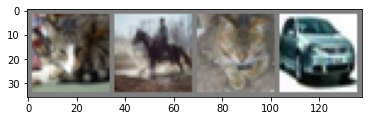

In [24]:
def imshow(img):
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Get some random trainng images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images -
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Train the PyTorch Model

End to end 

#### Import Modules

In [25]:
%matplotlib inline

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### Download the training and test datasets

In [27]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  cat plane truck  deer


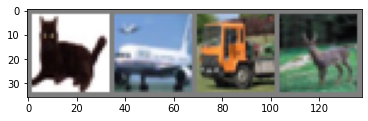

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Get some random trainng images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images -
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

The below model class is similar to LeNet model adapted for 3-color images

In [29]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # 3 channels (r, g, b), 6 output channels and 5x5 square kernel
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

Now we would need a loss function and an optimizer

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [31]:
# loop over the train dataset 2 times
# each pass has an inner loop that iterates over the training data
# serving batches of transformed input images and their correct labels

for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data

    # zero the parameter gradients. 
    # Gradients are accumulated over a batch, if we do not reset them for every batch
    # they will keep accumulating, which will provide an incorrect gradient values, hence the learning will be wrong
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs) # the model predicts on this batch
    loss = criterion(outputs, labels) # compute the loss (difference between model outputs and true labels)
    loss.backward() # backward pass, and calculate the gradients that will direct the learning
    optimizer.step() # optimizer performs one step learning i.e. it uses the gradient from the previous step to nudge the learning weights
    # in the direction it thinks will reduce the loss.

    # print statistics
    running_loss += loss.item()
    # prints every 2000 mini-batches
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.165
[1,  4000] loss: 1.839
[1,  6000] loss: 1.661
[1,  8000] loss: 1.559
[1, 10000] loss: 1.517
[1, 12000] loss: 1.466
[2,  2000] loss: 1.408
[2,  4000] loss: 1.368
[2,  6000] loss: 1.350
[2,  8000] loss: 1.314
[2, 10000] loss: 1.310
[2, 12000] loss: 1.274
Finished Training


Note the loss is monotonically descending, indicating that our model is continuing to improve its performance on the training dataset.

As a final step we would check if the model is actually doing general learning, and not simply memorizing the dataset. This is called overfitting and usually indicates that the dataset is too small, or the model has more learning parameters that it needs to correctly model the dataset.

In [32]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


Although 54 % is not state of the art result but way better than random guessing in which case it would be 10 %

## Deployment with TorchScript

Torchscript is a static, high-performance subset of Python. It does the following -

1. Prototype your model with PyTorch
2. Control flow is preserved
3. First-class support if lists, dicts, etc.

In [33]:
# Compile the model code to a static representation
my_script_module = torch.jit.script(net)

In [34]:
my_script_module

RecursiveScriptModule(
  original_name=Net
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (pool): RecursiveScriptModule(original_name=MaxPool2d)
  (conv2): RecursiveScriptModule(original_name=Conv2d)
  (fc1): RecursiveScriptModule(original_name=Linear)
  (fc2): RecursiveScriptModule(original_name=Linear)
  (fc3): RecursiveScriptModule(original_name=Linear)
)

In [35]:
# Save the compiled code and model data so it can be loaded elsewhere
# The serialized version of this model is saved which contains the entire 
# model's computation graph and learning rates.
my_script_module.save("my_script_module.pt")

Pytorch JIT -

An optimizing just-in-time compiler for PyTorch programs. They are -

1. Leightweight, thread-safe interpreter
2. Easy to write custom transformations
3. Not just for inference. Autodiff support.

In [36]:
# We can load the torchscript model like this -

import torch
saved_module = torch.jit.load('my_script_module.pt')

In [42]:
input = torch.rand(1, 3, 32, 32)
print("\n Image batch shape: ")
print(input.shape)


 Image batch shape: 
torch.Size([1, 3, 32, 32])


In [43]:
output = saved_module(input)
print('\n Raw Output: ')
print(output.shape)


 Raw Output: 
torch.Size([1, 10])


In [44]:
output

tensor([[ 1.4590, -1.8992,  0.6977,  0.5717,  0.0432, -0.0106, -0.8352, -1.0024,
          1.4779, -0.7724]], grad_fn=<DifferentiableGraphBackward>)

You can also load this in PyTorch C++ runtime to remove the interpreted language dependency. 


TorchScript can be deployed using Torchserve.

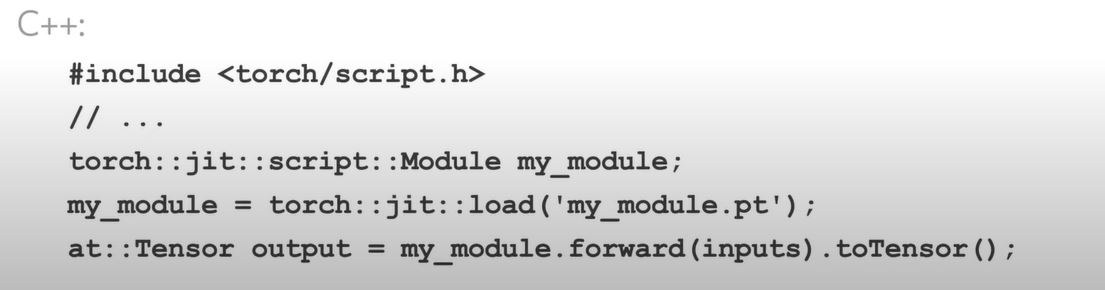

In [45]:
from IPython.display import Image
Image('images/torch_script_c++.JPG', width = 700, height = 200)